# AM207 Final Project: Learning Latent Subspace in VAEs
**AM 207: Advanced Scientific Computing**<br>
**Instructor: Weiwei Pan**<br>
**Fall 2019**

**Team:** 
* Xiaoxiao Ding
* Nathan Einstein
* Rachel Moon
* Pat Sukhum

### Problem statement - what is the problem the paper aims to solve?

The authors consider the problem of enabling greater interpretability of and control over the latent variables (features) learned by semi-supervised generative models. They propose a Variational Autoencoder (VAE)-based model that factorizes the latent space (i.e. set of latent variables) into two independent subspaces: one (W) that encodes a specified set of one or more binary attributes (labels Y), and another (Z) that encodes all other information about the distribution of inputs. This model, Conditional Subspace VAE (CSVAE), has the following two objectives: (1) learning higher-dimensional latent features correlated with binary labels in the data, and (2) representing these features using a subspace that is easy to interpret and manipulate when generating or modifying data. The authors demonstrate the utility of the learned representations for attribute-manipulation tasks on two face datasets.

### Context/scope - why is this problem important or interesting?

Semi- and un-supervised deep generative models such as variational autoencoders (VAE) are useful for learning (inferring) a distribution of latent variables that "explain" the observations, X. We can then sample new values from the distribution that should generate new observations that look similar in distribution to the original observations. In particular, VAEs find functional approximations of q(z|X), a distribution over Z that gives more weight to latent variable values that are likely to have generated the observed data; and p(X|z), or a mapping from the set of normally-distributed latent variables to a complex distribution that approximates the distribution of observations, p(X) [5]. 

However, the very unsupervised, "deep" nature of this approach to estimating the distribution of latent variables means that the latent variables are often hard to interpret, failing to clearly correspond to specific semantically-meaningful features found in the original data. It would be beneficial if the latent subspace were organized according to specific attributes so that users can understand the latent structure and manipulate the latent variables, in order to generate data with specific target attributes. Or conversely, it may be desirable (e.g. due to fairness considerations) to generate observations in a manner in which we can be assured is independent of certain protected attributes found in the original data [1]. Conditional Subspace VAE (CSVAE) aims so solve this problem by factoring the latent space into two subspaces, one (W) that contains information about a (known) attribute label $y$, and another (Z) that contains no information about that label. 

To provide an example of why this problem is of interest, consider CelebA faces dataset that the paper used. With other traditional unsupervised generative models such as VAE, users are able to tweak the latent variables to generate new celebrity faces. However, users are not able to control for specific facial features, because they do not know how the latent subspace encodes information about facial features; therefore, they cannot generate faces in a way they desire (e.g. a variation of faces from smiling to not smiling). On the contrary, with CSVAE, users are able to tweak a new continuous latent subspace W that only encodes information about specific facial attributes they are interested in (e.g. smiling vs not smiling), and they are thus able to generate new faces with desired variations of facial attributes.

Interestingly, the CSVAE approach of disentangling latent representations can also be used to evaluate the fairness of the downstream prediction algorithms [1]. Using CSVAE model, the unobserved binary sensitive variable (such as race, age, or gender) can be separated out from other attributes and instead would be encoded in a separate latent subspace W. CSVAE model's ability to induce a disentangled structure in the learned representation can allow users to easily eliminate the influence of sensitive attributes when performing model prediction tasks.

### Existing work - what has been done in literature?

Variational Autoencoder model (VAE) was proposed in 2013 and have been used extensively in research to yield state-of-the-art machine learning results in image generation and reinforcement learning [2, 3]. In the probability model framework, a variational autoencoder contains a specific probability model of data $x$ and latent variables $z$. We can write the joint probability of the model as $p(x,z) = p(x |z) p(z)$. 

The generative process can be written as: for each datapoint $i$, 
- draw latent variables $z_i \sim p(z)$
- draw datapoint $x_i \sim p(x\mid z)$


To realize the above two processes, there are three main innovations in the VAE model:
- **Variational Inference**: when the posterior distribution is intractable at the EM-equivalent optimization, we set $q(z_n) = N(z_n; \mu_n, \Sigma_n)$ with $\Sigma_n$ being diagonal.

- **Amortization**: once we have an optimized model after EM for one observed data point, we propose a reasonable hypothesis that for closely distributed data point, their variational inference should also have similar parameters, i.e. there exists a continuous function for $x_n$ such that we can predict $g_\phi (x_n) = \mu_n, \Sigma_n$. 

- **Joint Training**: since we have no information regarding either the variational inference parameter or the model parameter, we conduct joint training for all parameters in EM-equivalent optimization. 

CVAE is an extension of  Variational Autoencoder (VAE), where a latent space is introduced to enable control over data generation, as CVAE optimizes over its variational lower bound to learn the model on latent variables and data directly. To distinguish CSVAE proposed by this paper from traditional models, we summarize the feature of existing work on CVAE, CVAE-info and CSVAE as the following.

CondVAE: There is only one latent variable Z. Therefore, Z will tend to be correlated with Y -- i.e. the latent space is not well-separated into regions corresponding to distinct values of Y. 

CondVAE-info: An adversarial network is used to promote the encoder learning to decorrelate Y and Z (i.e. separate information from Y and Z). The decoder is fed both values Y and Z during training. 

$\beta$-VAE: Higgens et al. [6] modify the traditional VAE loss function by introducing a coefficient on the KL-divergence term, which serves as an adjustable hyperparameter that adjusts the amount of weight given to fitting the Gaussian prior p(z) and consequently, to maintaining independence among the different dimensions of $Z$. The CSVAE similarly involves a set of five coefficients that can be tuned to give priority to different components of the loss function.

### Contribution - what is gap in literature that the paper is trying to fill? What is the unique contribution

The proposed model is a type of Conditional Variational Autoencoder (CVAE), with the objective to fill the gap in existing work on how to achieve better disentanglement without degrading the quality of the generative outputs (i.e. the degree to which $p(X|z)$ matches $p(X)$). Despite the fact that vanilla VAE encourages disentanglement of the latent generative factors as the posterior distribution over the generative factors $q(z|x)$ is desired to be closer to the isotropic Gaussian $N(0, I)$, meaning that the covariance $\Sigma$ of isotropic Gaussian is equal to an identity matrix $I$ and all the dimensions are independent. There is still research demand for any generative model to capture underlying data generative factors while a single latent unit can be sensitive to variations in single generative factors. 

Similar to CVAE-info, in CSVAE:

The posterior distribution of Z is a latent subspace that encodes information about X (Z is used for reconstruction of X), and the posterior of W is an uncorrelated latent subspace that encodes the value of Y (W is used for prediction of Y). Therefore, reconstruction of X and prediction of Y is separated. Unlike CondVAE-info, the decoder in CSVAE is only provided with W (and Z), and not the value of Y itself.

Overall, by adding a latent variable W that is independent of Z (as promoted through the network architecture and objective function), CSVAE decouples prediction information about Y, and reconstruction information about X. W is more interpretable and easier to manipulate because it is a continuous subspace that is higher dimensional than binary label Y.

### Technical content (high level) - what are the high level ideas behind their technical contribution


**1) Factorize information into 2 separate subspaces allowing for easy manipulation and generation**

The CSVAE objective adds to the original VAE objective an additional "adversarial" component that serves to minimize the mutual information between Z and Y. It therefore produces two independent subspaces, W and Z: W encodes information giving rise to different values of Y, while Z encodes information about all other factors, even if those factors may have originally been correlated with Y.

**2) Model binary Y labels in a higher-dimensional latent subspace W**

CSVAE attempts to model the binary Y labels in a higher-dimensional, continuous latent subspace W to not only capture the label information (whether $y_i$=0 or $y_i$=1), but to also capture finer-level details of the differences among multiple observations with the same value of $y_i$, by isolating generative information about that attribute into a single latent variable that users can adjust during the generative process. 




### Technical content (details) - highlight (not copy and paste entire sections) the relevant details that are important to focus on (e.g. if there's a model, define it; if there is a theorem, state it and explain why it's important, etc).

**Architecture Details**

The diagram below illustrates the architecture of the model: 

![alt text](https://i.imgur.com/g6rlrQ6.png)

The model approximates the variational posterior q(w|x, y) by putting a prior on the W subspace to be a mixture of 2 Gaussians where each $y_i$ has a separate mean and variance. Next, the variational posterior q(z|x) is computed by using X. 

The model also learns to disentangle the subspaces Z and W by including an adversarial component. This is done by training a model to predict Y from Z while at the same time penalizing the loss function if the model correctly predicts Y from Z. As a result, this forces the model to only keep information needed to predict X in Z and to leave any information about Y out of Z and only in W. 

**Objective Function**

The model uses the following objective function:

$$\min_{\theta, \phi, \gamma}\beta_1 M_1 +\beta_2M_2$$

$$\max_{\delta}\beta_3 N$$


The first component, $M_1$, is the traditional loss function that we have from a Conditional VAE where we maximize the variational lower bound of the marginal log likelihood of the model. In particular,

\begin{align}
\text{ELBO} &= \mathbb{E}_{q(z,w)} \left[ \log \frac{p(x,y,w,z)}{q(w,z|x,y)} \right ] \\ 
&= \mathbb{E}_{q(z,w|x,y)} \left[ \log p(x,y,w,z) - \log q(w,z|x,y) \right ]
\end{align}

As noted below, the second two parts of the objective allow us to assume independence of Z and W and Z and Y, such that the above can be written:

\begin{align}
&= \mathbb{E}_{q(z,w|x,y)} \left[ \log p(x|y,w,z) + \log p(z|w,y) + \log p(w|y) + \log p(y) - \log \left( q(z|x,y)q(w|x,y)\right) \right ] \\
&= \mathbb{E}_{q(z,w|x,y)} \left[ \log p(x|w,z) + \log p(z) + \log p(w|y) + \log p(y) - \log q(z|x,y) - \log q(w|x,y)  \right ] \\
&= \mathbb{E}_{q(z,w|x,y)} \left[ \log p(x|w,z) \right] + \mathbb{E}_{q(z,w|x,y)} \left[ \log \frac{p(z)}{q(z|x,y)} \right] +  \mathbb{E}_{q(z,w|x,y)} \left[ \log \frac{p(w|y)}{q(w|x,y)} \right] + \log p(y)
\end{align}

Rather than maximizing the ELBO, we minimize the negative of the ELBO:

\begin{align}
& -\mathbb{E}_{q(z,w|x,y)} \left[ \log p(x|w,z) \right] + \mathbb{E}_{q(z,w|x,y)} \left[ \log \frac{q(z|x,y)}{p(z)} \right] +  \mathbb{E}_{q(z,w|x,y)} \left[ \log \frac{q(w|x,y)}{p(w|y)} \right] - \log p(y) \\
&=  -\mathbb{E}_{q(z,w|x,y)} \left[ \log p(x|w,z) \right] + D_{KL}\left[q(z|x,y)||p(z)\right] + D_{KL}\left[q(w|x,y)||p(w|y) \right] - \log p(y)
\end{align}

Stated verbally, the model leverages Jensen’s inequality to obtain a variational lower bound on the intractable likelihood function so that we can optimize. In addition to the usual "reconstruction loss" term, the KL Divergence terms in the above ensure that the posterior distribution we learn is similar to the prior we have defined (Gaussian mixtures). 

The second part of the objective function ($M_2$) corresponds to the minimization of the mutual information between Z and Y. The authors leverage approximate posteriors q(y|z) and q(z|x) to compute the conditional entropy and since maximizing conditional entropy is equivalent to minimizing mutual information, this goal is achieved through this component. 

Lastly, the third part of the CSVAE objective ($N$) corresponds to learning the approximate posterior q(y|z) to maximize the log likelihood of predicting y from z. The terms $M_2$ and $N$ serve as the adversarial component of the model--$N$ aims to maximize information about label Y encoded in Z, whereas $M_2$ component attempts to minimize the mutual information between Z and Y.

The coefficient terms of $M_1$ and $M_2$ etc are essential to ensure a convergence of the loss function during training. They are adjusted during training to improve training outcome. 

### Experiments - which types of experiments were performed? What claims were these experiments trying to prove? Did the results prove the claims?

**1. Toy data: swiss roll**

The authors first trained CSVAE model on the 3D Swiss Roll toy data available from sklearn package. Their goal was to let readers gain intuition about their model by providing a visualization of how the CSVAE model structures the lower-dimensional latent spaces Z and W, and also showing reconstructed swiss roll shape. In the swiss roll model, two Y labels were assigned by splitting the roll in half and assigning label 0 to datapoint if $x<10$, and assigning label 1 if $x > 10$.

The projections of latent subspaces Z and W show that W separates the datapoints by two Y labels, whereas in Z all the datapoints from two different classes are overlapping, which means that Z hasn't learned to separate data by Y labels (i.e. Z is decorrelated with Y). Moreover, their original swiss roll and reconstructed swiss roll graph shows that the CSVAE model did a decent job in reconstructing the swiss roll shape by decoding latent variables from Z and W subspaces. 

Therefore, the visualization results proved their claims that W latent space learned to separate datapoints by Y, whereas Z subspace didn't learn to separate datapoints by Y. However, this experiment does not show the model's application case and its functionality on generating new data by manipulating latent variables in W subspace. 


**2. Faces image data**

The goals of this experiment were: (1) visually prove that CSVAE model enables users to manipulate target attributes (while controlling for other attributes) when generating new images by tweaking latent variables in subspace W, and (2) compare and evaluate its qualitative and quantitative performance against other baseline models (VAE, Cond-VAE, and CondVAE-info). The authors used faces images data (Toronto Faces dataset and CelebA dataset) to generate face images with specific target attribute conditions. Toronto Faces dataset had binary labels of emotion (e.g. anger, sad, happy), and CelebA data subsets were chosen so the image data have binary Y labels that encode the presence of facial hair and glasses. The authors used these binary Y labels to encode the attribute information in latent subspace W, and then sampled values from distribution of W subspace to generate face images that varied in Y label attribute (e.g. generated variations of smiling face).

The generated image results indeed proved that CSVAE model allows users to generate images with a variety of target attribute styles. By sampling different variable values in subspace W, the authors were able to show numerous generated facial images that varied greatly in the range of target attributes. For example, when Y labels of happy vs. not happy were encoded in W, the authors could manipulate the latent variable values in W subspace so they can generate images of a same person's face with a wide variety of smiles, such as smiling with mouth open, mouth closed, teeth showing, etc. On the contrary, CondVAE or CondVAE-info models only generated images with one type of smile. The authors also visually proved that it is easy to transfer style attributes onto different person's faces, which demonstrates that the style attribute is disentangled from Z subspace that encodes all information but Y style attribute. Furthermore, even when the binary Y labels were not exclusive and were correlated, CSVAE models still enabled users to independently manipulate attributes in the generated face images. 

The authors then quantitatively compared performances between CSVAE and baseline models. First, they trained a classifier that predicts Y using reconstructed image X, in order to evaluate how well the models are able to generate images with desired target attributes. Next, they compared the mean squared errors between the original image (person's face), ground truth image(person's smiling face), and generated image. CSVAE model made the largest change to the original image, while getting closest to the ground truth image. This means that CSVAE model was able to tweak original image a lot to produce specific desired target attributes, while the resulting generated image closely resembles the ground truth image of the face already with the target attribute. 

### Evaluation (your opinion) - do you think the work is technically sound? Do you think the proposed model/inference method is practical to use on real data and tasks? Do you think the experimental section was strong (there are sufficient evidence to support the claims and eliminate confounding factors)?

CSVAE model is able to disentangle information about binary label Y from latent subspace Z, and encode the Y label information onto a higher-dimensional continuous subspace W, through encoder/decoder network and adversarial network. The proposed model is promising because it provides more power to human users: the model allows us to determine how the latent spaces are structured, which makes it more interpretable and controllable. In other words, it allows the users to control how the target attribute Y is used in the model. Being able to separate W subspace that encodes Y information from subspace Z allows us to manipulate the degree of target attribute in the reconstructed data while controlling for other attributes. Moreover, if the Y labels are sensitive attributes such as gender or race, the users can train the model so W encodes information about sensitive information, and then evaluate the model's fairness by comparing prediction performance when the model uses both Z and W latent variables vs. when the model just uses Z. In summary, the model is practical and useful for image data generation and model fairness evaluation, and has the potential to be applicable in other real-world tasks. 

One limitation for the real-world application is that the model currently only works with binary Y classes (e.g. presence or absence of an attribute). It has not yet been explored if the model still would work when Y labels are categorical, or continuous variables. Furthermore, the ease with which this model could be extended to factorize the latent variables into more than two independent subspaces is unclear; since it makes most sense to encode only a single semantically-meaningful attribute in the $W$ subspace, this model is therefore relatively limited in the degree to which it can disentangle multiple attributes of interest.

We feel that the results and conclusions of the authors' experiments are not too strong overall, as they limit their evaluations of the model to image datasets. In particular, it is difficult to evaluate the distribution of the evidence $P(X)$ and the posterior predictive distributions $P(X|z,w)$, making evaluation of their contribution of including $W$ difficult. It would have been better if they had a pedagogical and easier numerical example which they already know the answer distribution. Moreover, distribution choices for $W$ were arbitrary and fixed, as are the five coefficients included in the loss function, instead of being learned from the model training or theoretically grounded.

Although the authors qualitatively proved by showing multiple generated images that CSVAE model can generate images with more variations of target attributes in a controlled manner compared to other baseline VAE models, this is a hand-wavy argument because we cannot numerically and objectively evaluate what is a better, more realistic and plausible face. The photos provided in the paper are very small so it is very difficult to assess how realistic and crisp these generated images are. Of course it is great that users can produce variations of generated images, but it would only be useful if they are all realistic enough so they can all be used as real data. The quantitative performance comparison also was not statistically significantly different, so the authors cannot definitively conclude that CSVAE model is better than other models. CSVAE model does provide disentangle specific target attributes from others, but that doesn't mean that the resulting variations of generated images will be realistic. 

# Code

## Part 1. At least one clear working pedagogical example demonstrating the problem the paper is claiming to solve. 


As a pedagogical example, we chose Swiss roll data set that the authors used, in order to easily visualize W and Z latent subspaces as well as the reconstructed output. Through using this dataset that is intuitively easy to interpret and understand, we prove that CSVAE model successfully factorizes out Y information from Z, and instead encodes Y label information to W. 

In [0]:
# import packages
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from torchvision.datasets import ImageFolder
from torchvision import transforms, datasets
import sklearn.datasets

import numpy as np
import pandas as pd
import scipy
from scipy.ndimage.measurements import center_of_mass
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm, trange
import seaborn as sns
from itertools import chain

torch.manual_seed(0)
np.random.seed(0)

%matplotlib inline

In [0]:
#-------------------
# define parameters
#-------------------
num_epochs = 200
learning_rate = lr = 1e-3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

latent_dim_z = 2
latent_dim_w = 2
x_dim = 3

In [0]:
#---------------------------
# building the CSVAE model
#---------------------------

### Definition of KL divergence ###
def KL_normal_normal(p_mu, p_logvar, q_mu, q_logvar):
    # calculate KL divergence between two normal distributions
    p_var = torch.exp(p_logvar)
    q_var = torch.exp(q_logvar)
    return torch.sum(
        torch.log(q_var ** 0.5) - torch.log(p_var ** 0.5) + \
        (p_var + (p_mu - q_mu) ** 2) / (2. * q_var) - 0.5, dim=-1)
    

### CSVAE model implementation ###
class CSVAE(nn.Module):
    def __init__(self, f_inference_W, f_inference_Z, f_generative_X, f_generative_Y, x_recon_loss_fn=nn.MSELoss(reduction='none')):
        super().__init__()
        self.f_inference_W = f_inference_W     # q(w|x,y)
        self.f_inference_Z = f_inference_Z     # q(z|x)
        self.f_generative_X = f_generative_X   # p(x|w,z)
        self.f_generative_Y =  f_generative_Y  # p(y|w)
        self.x_recon_loss_fn = x_recon_loss_fn
        
        # set optimizers for loss function
        self.optimizer1 = torch.optim.Adam(chain(self.f_generative_X.parameters(), self.f_inference_W.parameters(), self.f_inference_Z.parameters()), lr=learning_rate)
        self.optimizer2 = torch.optim.Adam(self.f_generative_Y.parameters(), lr=learning_rate)

    def forward(self, x, y, mode='train'):

        # encoder
        z, z_mean, z_logvar = self.f_inference_Z(x)

        w, w_mean, w_logvar = self.f_inference_W(x, y.unsqueeze(-1).float())
        
        # decoder
        x_pred, x_mean, x_logvar = self.f_generative_X(w,z)
        
        y_pred = self.f_generative_Y(z)

        # calculate loss and perform gradient update if mode=='train'
        loss_M1, loss_M2, loss_N = self.calculate_loss(x, y, x_pred, y_pred, 
                                                       z, w, x_mean, x_logvar,
                                                       w_mean, w_logvar, z_mean, 
                                                       z_logvar, mode=mode)

        results_dict = dict(x_pred=x_pred, y_pred=y_pred, z=z, w=w,
                    x_mean=x_mean, x_logvar=x_logvar, w_mean=w_mean,
                    w_logvar=w_logvar, z_mean=z_mean, z_logvar=z_logvar)
        
        return results_dict, loss_M1, loss_M2, loss_N


    def calculate_loss(self, x, y, x_pred, y_pred, z, w, x_mean, x_logvar,
             w_mean, w_logvar, z_mean, z_logvar, 
             beta1=20., beta2=1., beta3=0.2, beta4=10., beta5=1., mode='train'):
      

        ## find KL divergence of q(w|x,y) and p(w|y)
        #    p(w|y=1) = N(0, 0.1^2)
        w_mean_p_y1 = torch.zeros_like(w_mean)
        w_logvar_p_y1 = torch.ones_like(w_logvar) * np.log(0.1 ** 2)
        #    p(w|y=0) = N(3, 1.0^2)
        w_mean_p_y0 = torch.ones_like(w_mean) * 3.
        w_logvar_p_y0 = torch.zeros_like(w_logvar)


        kl_w_y1 = KL_normal_normal(w_mean, w_logvar, w_mean_p_y1, w_logvar_p_y1)
        kl_w_y0 = KL_normal_normal(w_mean, w_logvar, w_mean_p_y0, w_logvar_p_y0)
        kl_w = torch.where(y.int() == 1, kl_w_y1, kl_w_y0)

        ## find KL divergence of q(z|x,y) and p(z)
        #     p(z) = N(0,1)
        z_mean_p = torch.zeros_like(z_mean)
        z_logvar_p = torch.zeros_like(z_logvar)
        kl_z = KL_normal_normal(z_mean, z_logvar, z_mean_p, z_logvar_p)

        x_recon_loss = torch.sum(self.x_recon_loss_fn(x_mean, x), -1)

        if mode == 'train':
            self.optimizer1.zero_grad()

        loss_M1 = torch.mean(beta1 * x_recon_loss + beta2 * kl_w + beta3 * kl_z)
        loss_M2 = beta4 * torch.mean(torch.sum(y_pred * torch.log(y_pred), -1))

        if mode == 'train':
            loss_M = loss_M1 + loss_M2
            loss_M.backward(retain_graph=True)
            self.optimizer1.step()

            self.optimizer2.zero_grad()
        
        loss_N = beta5 * torch.where(y.int() == 1,
                                -y_pred[:, 1].log(),
                                -y_pred[:, 0].log()).mean()
        if mode == 'train':
            loss_N.backward()
            self.optimizer2.step()
        
        return loss_M1, loss_M2, loss_N
        
    
#==================================================================================
# Note: unlike most VAE-based models that hard-code the architecture of the
# functional approximations (generally neural nets) of q(z|x) and p(x|z), we keep 
# these definitions separate to illustrate that they are a design choice, and not 
# intrinsic to the model.
#==================================================================================


# define encoders (inference neural network)
def sample_normal(mu, logvar):
    return torch.randn_like(mu) * torch.exp(0.5 * logvar) + mu


class InferenceNet_W(nn.Module):
    """Approximates q(w|x,y)"""
    
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.output_dim = output_dim
        self.fc_layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2 * output_dim)
        )

    def forward(self, x, y):
        output = self.fc_layers(torch.cat((x, y), dim=-1))
        mu = output[:, :self.output_dim]
        logvar = output[:, self.output_dim:] 
        w = sample_normal(mu, logvar)
        return w, mu, logvar


class InferenceNet_Z(nn.Module):
    """Approximates q(z|x)"""
    
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.output_dim = output_dim
        self.fc_layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2 * output_dim)
        )

    def forward(self, x):
        output = self.fc_layers(x)
        mu = output[:, :self.output_dim]
        logvar = output[:, self.output_dim:] 
        z = sample_normal(mu, logvar)
        return z, mu, logvar


# define decoders (generative neural network)

class GenerativeNet_X(nn.Module):
    """Approximates p(x|w,z)"""
    
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.output_dim = output_dim
        self.fc_layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2 * output_dim)
        )

    def forward(self, w, z):
        output = self.fc_layers(torch.cat((w, z), dim=-1))
        mu = output[:, :self.output_dim]
        logvar = output[:, self.output_dim:]
        x = sample_normal(mu, logvar)
        
        return x, mu, logvar

class GenerativeNet_Y(nn.Module):
    """Approximates p(y|z)"""           
        
    def __init__(self, input_dim, n_class=2):
        super().__init__()
        self.fc_layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, n_class)
        )

    def forward(self, z):
        output = F.softmax(self.fc_layers(z), dim=-1)
        return output

In [0]:
#===========
# run model
#===========

# load data
xs, _ = sklearn.datasets.make_swiss_roll(10000)
xs = xs.astype(np.float32)
ys = (xs[:, 1] < 10).astype(np.int32)
trainloader = torch.utils.data.DataLoader(list(zip(xs, ys)), shuffle=True, batch_size=256)


# initiate model
encoder_w = InferenceNet_W(x_dim + 1, latent_dim_w)
encoder_z = InferenceNet_Z(x_dim, latent_dim_z)

decoder_x = GenerativeNet_X(latent_dim_w+latent_dim_z, x_dim)
decoder_y = GenerativeNet_Y(latent_dim_w)

model = CSVAE(encoder_w, encoder_z, decoder_x, decoder_y)

# train model
history = {'loss_M1':[], 'loss_M2':[], 'loss_N':[]}
with trange(num_epochs) as t:
    for i in t:
        t.set_description(f'Epoch {i}')
        
        for x, y in trainloader:
            
            results_dict, loss_M1, loss_M2, loss_N = model.forward(x,y)
            history['loss_M1'].append(loss_M1)
            history['loss_M2'].append(loss_M2)
            history['loss_N'].append(loss_N)

Epoch 199: 100%|██████████| 200/200 [01:05<00:00,  3.11it/s]


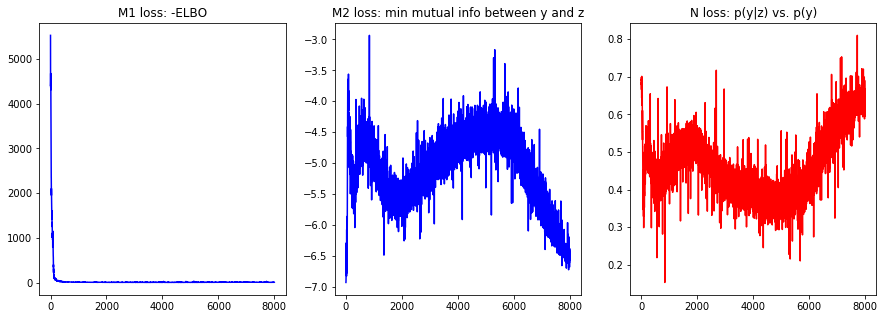

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].plot(history['loss_M1'], color='b')
axes[1].plot(history['loss_M2'], color='b')
axes[2].plot(history['loss_N'], color='r')
[ax.set_title(title) for ax, title in zip(axes, ["M1 loss: -ELBO", 
                                                 "M2 loss: min mutual info between y and z", 
                                                 "N loss: p(y|z) vs. p(y)"])];

In [0]:
# collected reconstructed data from model
with torch.no_grad():
    _, zs, _ = encoder_z(torch.from_numpy(xs))
    _, ws, _ = encoder_w(torch.from_numpy(xs), torch.from_numpy(ys).unsqueeze(-1).float())
    _, x_pred, _ = decoder_x(ws, zs)
    x_pred = x_pred.cpu().numpy()

In [0]:
def plot_projection(xvals, yvals, color_vals, xlab, ylab, ax):
    sns.scatterplot(x=xvals, y=yvals, hue=color_vals, alpha=0.4, ax=ax, size=1, legend='full')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(f"({xlab}, {ylab})")

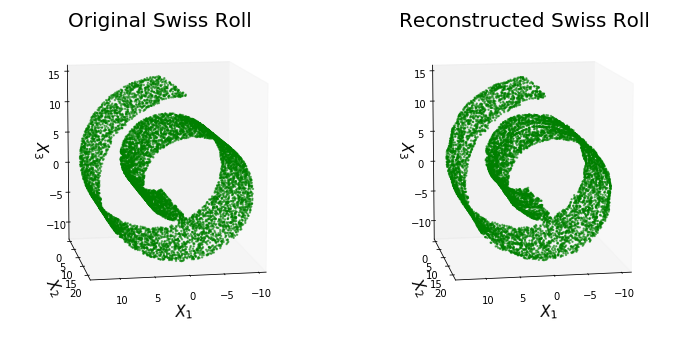

In [0]:
#--------------
# plot results
#--------------
fig = plt.figure(figsize=(12,6))

# plot of original shape
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid(False)
ax.view_init(azim=80, elev=10)
ax.scatter(xs[:, 0], xs[:, 1], xs[:, 2], color="green", s=2, alpha=0.5)
ax.set_title('Original Swiss Roll', fontsize=20)
ax.set_xlabel('$X_1$', fontsize=15)
ax.set_ylabel('$X_2$', fontsize=15)
ax.set_zlabel('$X_3$', fontsize=15)

# plot of reconstructed shape
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.grid(False)
ax.view_init(azim=80, elev=10)
ax.scatter(x_pred[:, 0], x_pred[:, 1], x_pred[:, 2], color="green", s=2, alpha=0.5)
ax.set_title('Reconstructed Swiss Roll', fontsize=20)
ax.set_xlabel('$X_1$', fontsize=15)
ax.set_ylabel('$X_2$', fontsize=15)
ax.set_zlabel('$X_3$', fontsize=15)
plt.show()

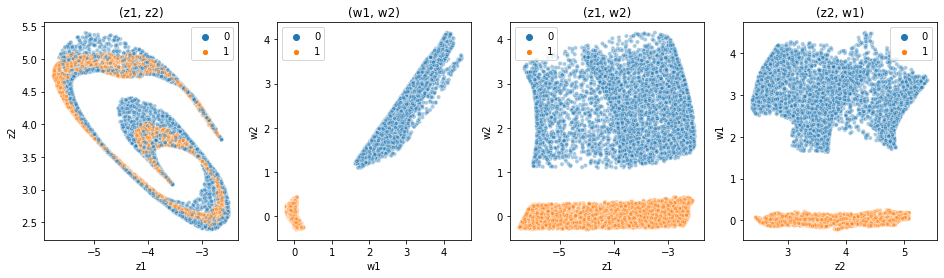

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
plot_projection(zs[:,0], zs[:,1], ys, "z1", "z2", axes[0])
plot_projection(ws[:,0], ws[:,1], ys, "w1", "w2", axes[1])
plot_projection(zs[:,0], ws[:,1], ys, "z1", "w2", axes[2])
plot_projection(zs[:,1], ws[:,0], ys, "z2", "w1", axes[3])

The first set of plots visually demonstrate that the CSVAE model can reconstruct the form of the original observations almost perfectly. (It does not make sense to compare the distribution of the input and reconstructed output though, given that the inputs follow a non-stochastic pattern. For the same reason, this dataset is of limited value for examining the generative value of the model, since any novel generated example that differs from the original observations is "undesirable" (i.e. falls clearly outside of the "distribution" of the original observations).

The second set of plots illustrate the relationships between the W and Z latent spaces, shading the observations according to the predicted value of Y (given Z). 

The plots for (z1,w2) and (z2, w1) show that most of the variation in Y is orthogonal to the z axes and is evenly spread (horizontally) along these axes, suggesting that it would be very difficult to predict Y from Z alone. The plot of (z1, z2) shows that Y also cannot be predicted from the combination of the two dimensions of Z.

The second plot illustrating the complete W subspace reveals that the predicted binary Y values are almost perfectly separated -- that is, W successfully encodes the values of Y out in W subspace dimensions that encodes Y information, whereas in Z subspace the binary Y labels are mixed.

We should note that making relatively small changes in the approximating functions' (neural network) architectures and adjusting the weights of the different terms in the loss function causes dramatic changes in the structure of the latent spaces and the degree to which Z is independent of Y and W. The results are highly variable even when training a new model with the same set of hyperparameters. In every case, though, the quality of the reconstructed examples (i.e. the first set of plots) is unaffected. Hyperparameter-tuning and evaluation of the learned latent space is therefore critical to ensuring that the model has successfully factorized two, independent latent subspaces. We discuss more in detail in Part 4.

## Part 2. At least a bare bones implementation of the model/algorithm/solution


The CSVAE model code is implemented in Part 1 (immediately above).

## Part 3. Demonstration on at least one instance that your implementation solves the problem.


**1. CSVAE vs. CondVAE model on the Swiss roll dataset**

We first experimented with training a CVAE on the Swiss roll dataset to compare its performance relative to the CSVAE's on the previous example in Part 1 that allows easy visualization of the latent space. The following CVAE implementation uses the same inference and generative network architecture as used for the CSVAE, above. The goal is to prove that our implementation of CSVAE model solves the factorization problem, whereas the baseline CVAE model is not able to learn to separate Y label information in Z latent subspace.

In [0]:
class CVAE(nn.Module):
    
    def __init__(self, f_inference, f_generative, recon_fn):
        super().__init__()
        self.f_inference = f_inference
        self.f_generative = f_generative
        self.recon_fn = recon_fn
        
    def forward(self, x, y):
        x = x.float()
        y = y.float()
        xy = torch.cat((x, y), dim=1) # xy is [batch_size, input_size + n_classes]
        z, z_mean, z_logvar = self.f_inference(xy) # z_mean, z_logvar are [batch_size, latent_dim], z is [batch_size, latent_dim] 
        zy = torch.cat((z, y), dim=1)
        x_hat = self.f_generative(zy)
        return x_hat, z_mean, z_logvar 

    def loss(self, x, x_hat, mean, log_var):
        """ VAE objective function:
                 
            log p(x|c) - KL[q(z|x,c) || p(z|x,c)] = reconstruction loss - KL divergence
        """
        # reconstruction loss
        RCL = self.recon_fn(x_hat, x)  # log-likelihood
            
        # kl divergence loss
        KLD = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())
        return RCL + KLD


#===============================================================
# Simple neural networks to approximate inference and generative 
# functions ("encoder" and "decoder").
#===============================================================
def sample_normal(mu, logvar):
    return torch.randn_like(mu) * torch.exp(0.5 * logvar) + mu

class InferenceNet(nn.Module):
    """Approximates q(z|x)"""
    
    def __init__(self, input_dim, latent_dim, n_classes):
        super().__init__()
        self.latent_dim = latent_dim
        self.fc_layers = nn.Sequential(
            nn.Linear(input_dim + n_classes, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 2 * latent_dim)
        )

    def forward(self, x):
        output = self.fc_layers(x)
        mu = output[:, :self.latent_dim]
        logvar = output[:, self.latent_dim:] 
        z = sample_normal(mu, logvar)
        return z, mu, logvar


class GenerativeNet(nn.Module):
    """Approximates p(x|w,z)"""
    
    def __init__(self, latent_dim, output_dim, n_classes, final_activation=None):
        super().__init__()
        self.output_dim = output_dim
        self.final_activation = final_activation
        self.fc_layers = nn.Sequential(
            nn.Linear(latent_dim + n_classes, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, output_dim)
        )

    def forward(self, zy):
        x_hat = self.fc_layers(zy)
        if self.final_activation is not None:
            x_hat = self.final_activation(x_hat)
        return x_hat


#=================================
# Common log-likelihood functions   
#================================= 

class NormalLogLikelihood(nn.Module):
    def __init__(self, mean, var):
        super().__init__()
        self.mean = mean
        self.var = var

    def forward(self, pred):
        NLL = -0.5 * torch.log(2 * np.pi * self.var) - torch.pow(pred - self.mean, 2) / (2 * self.var)
        return NLL.sum()


class BernoulliLogLikelihood(nn.Module):
    """ Equivalent to negative binary cross-entropy
    """
    def __init__(self):
        super().__init__()
        # Note: BCE with logits is more numerically-stable than vanilla BCE: 
        # https://pytorch.org/docs/stable/nn.html#torch.nn.BCEWithLogitsLoss
        self.bce_with_logits = nn.BCEWithLogitsLoss(reduction='sum')

    def forward(self, x_hat, x):
        return self.bce_with_logits(x_hat, x)


#=================================
# Helper functions
#=================================

def onehot_encode(idx, n_classes):
    onehot = torch.zeros(idx.size(0), n_classes)
    onehot.scatter_(1, idx.data, 1)
    return onehot

def plot_losses(history):
    fig, ax = plt.subplots(1,1)
    ax.plot(history, linewidth=3)
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.legend()
    fig.tight_layout();

No handles with labels found to put in legend.


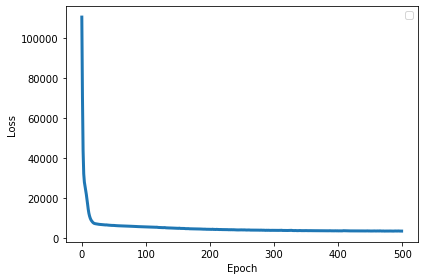

In [0]:
#=====================================================
# Initialize the Swiss roll dataset and the CVAE model
#=====================================================
batch_size = 512    
epochs = 500         
input_dim = 3
latent_dim = 2
n_classes = 1          
lr = 1e-3      

# create dataset
xs, _ = sklearn.datasets.make_swiss_roll(10000)
xs = xs.astype(np.float32)
ys = (xs[:, 1] < 10).astype(np.int32)
dataloader = torch.utils.data.DataLoader(list(zip(xs, ys)), shuffle=True, batch_size=batch_size)


# instantiate CVAE model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

inference_nn = InferenceNet(input_dim, latent_dim, n_classes)
generative_nn = GenerativeNet(latent_dim, input_dim, n_classes, None)
neg_log_likelihood = lambda x_hat, x: F.mse_loss(x_hat.float(), x.float(), reduction='sum')

cvae_model = CVAE(inference_nn, generative_nn, neg_log_likelihood)
cvae_model = cvae_model.to(device)

optimizer = torch.optim.Adam(cvae_model.parameters(), lr=lr)   

#=====================================
# Train CVAE model on Swiss roll data
#=====================================
def train():
    cvae_model.train()
    train_loss = 0
    for i, (x, y) in enumerate(dataloader):
        x = x.to(device)
        y = y.view(-1, 1)
        y = y.to(device)

        optimizer.zero_grad()

        x_hat, z_mean, z_logvar = cvae_model(x, y)
        loss = cvae_model.loss(x, x_hat, z_mean, z_logvar)
        loss.backward()
        train_loss += loss.item()

        optimizer.step()
    return train_loss


history = []
for e in range(epochs):
    train_loss = train()
    train_loss /= len(dataloader)
    history.append(train_loss)
    #print(f'Epoch {e}, Train Loss: {train_loss:.2f}')

plot_losses(history)

with torch.no_grad():
    x_pred, z_mean, z_logvar = cvae_model(torch.from_numpy(xs).to(device), torch.from_numpy(ys).view(-1,1).to(device))
    x_pred = x_pred.cpu().data 

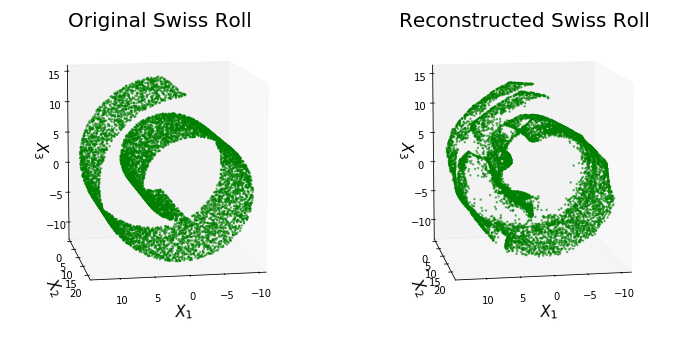

In [0]:
#==============
# plot results
#==============
fig = plt.figure(figsize=(12,6))

# plot of original shape
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid(False)
ax.view_init(azim=80, elev=10)
ax.scatter(xs[:, 0], xs[:, 1], xs[:, 2], color="green", s=2, alpha=0.5)
ax.set_title('Original Swiss Roll', fontsize=20)
ax.set_xlabel('$X_1$', fontsize=15)
ax.set_ylabel('$X_2$', fontsize=15)
ax.set_zlabel('$X_3$', fontsize=15)

# plot of reconstructed shape
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.grid(False)
ax.view_init(azim=80, elev=10)
ax.scatter(x_pred[:, 0], x_pred[:, 1], x_pred[:, 2], color="green", s=2, alpha=0.5)
ax.set_title('Reconstructed Swiss Roll', fontsize=20)
ax.set_xlabel('$X_1$', fontsize=15)
ax.set_ylabel('$X_2$', fontsize=15)
ax.set_zlabel('$X_3$', fontsize=15)
plt.show()

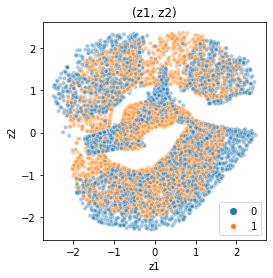

In [0]:
def plot_projection(xvals, yvals, color_vals, xlab, ylab, ax):
    sns.scatterplot(x=xvals, y=yvals, hue=color_vals, alpha=0.4, ax=ax, size=1, legend='full')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_title(f"({xlab}, {ylab})")

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,4))
plot_projection(z_mean[:,0].cpu().data, z_mean[:,1].cpu().data, ys, "z1", "z2", ax)

Interestingly, the quality of the reconstructed observations is significantly worse with the CVAE than with the CSVAE, even though the same architectures were used for the variational inference ($q(z|x)$) and generative ($p(x|z)$) function approximations (i.e. neural networks).

More noteably, however, is the difference in the factorization of the latent space: like with the CSVAE, there is little separation of the two different values of $Y$ in the latent space $Z$. But without the independent subspace $W$ of the CSVAE, there is no way to generate different synthetic examples that just vary according to the binary attribute associated with $Y$ and not other attributes as well. This factorization of the subspace into subspaces that do or do not encode information about $Y$ is precisely the issue that CSVAE is designed to address (albeit with limited success, as we have found).

**2. CSVAE trained on the dSprites dataset**

Although the authors used face image datasets to qualitatively show the functionality and application case of the CSVAE model, as discussed above, we believe these datasets are not necessarily suitable for quantitatively evaluating model performance in generating data. Therefore, we instead chose to evaluate the model on the dSprites dataset (https://github.com/deepmind/dsprites-dataset), developed as a benchmark for evaluating the disentanglement of latent variables, to evaluate the CSVAE model performance. The dataset is made up of 64x64-pixel, synthesized images of 2D shapes generated from 6 ground-truth independent latent variables (color, shape, scale, rotation, x and y positions). Since the dSprites images were synthesized from a known generative process, and the ground-truth latent variables can be easily measured, it allows us to quantitatively evaluate how the model performs, rather than qualitatively visualizing what happens when we tweak variables in latent subspaces.

We further simplified the dataset by limiting it to just images of squares, and selected only the largest and smallest scales to create a binary "shape size" attribute to use for creating conditionally-independent subspaces.

We perform several tests to check that the CSVAE model decorrelates information about this "size" attribute $Y$ from all other latent information encoded in the $Z$ subspace, and that information about $Y$ is fully and completely encoded in the independent subspace $W$. 

First, after checking that the values of $Y$ are well-separated in $W$ and are not visibly encoded in any of the marginal $Z$ dimensions, we check that adjusting the value of $W$ only changes $Y$ (shape size) and no other latent variables. We test this quantitatively by calculating the size (in terms of number of pixels) of the object in the reconstructed image sampled from p(x|w,z), varying W while keeping Z constant. We also check that the object does not change in location (one other latent variable encoded in $Z$ that is measurable) as $W$ is tweaked.

We then perform a similar operation with Z instead of W; as Z is adjusted holding $W$ fixed, we check that latent variables other than shape size are changed in the reconstructed image, whereas size remains constant, as a (partial) test that $Z$ does not encode any information about Y.


#### Dataset and Dataloader code

In [0]:
class DSpritesDataset(Dataset):

    def __init__(self, path_to_data, transform=None):
        dsprites = np.load(path_to_data)
        self.imgs = dsprites['imgs']
        self.latents_classes = dsprites['latents_classes']
        self.latents_values = dsprites['latents_values']
        self.transform = transform
        self.preprocess_data()

    def preprocess_data(self):
        ## (1) make scale binary: select images of scale 0.5 or 1
        bin_scale_indices = np.isin(self.latents_classes[:,2], [0,5])
        self.imgs = self.imgs[bin_scale_indices, ...]
        self.latents_classes = self.latents_classes[bin_scale_indices, ...]
        self.latents_values = self.latents_values[bin_scale_indices, ...]
        # re-label scale: 0 if scale=0.5, 1 if scale=1
        self.latents_classes[self.latents_classes[:,2] == 5, 2] = 1

        ## (2) use only square shapes
        squares_indices = self.latents_classes[:,1] == 0
        self.imgs = self.imgs[squares_indices, ...]
        self.latents_classes = self.latents_classes[squares_indices, ...]
        self.latents_values = self.latents_values[squares_indices, ...]

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        sample = self.imgs[idx] * 255
        # Reshape image from (H, W) -> (H, W, C)
        sample = sample.reshape(sample.shape + (1,))
        if self.transform:
            sample = self.transform(sample)
        label = self.latents_classes[idx]
        # set label to 1 if sprite is large, 0 otherwise
        label = int(label[2] == 1)
            
        return sample, label


def get_data_loaders(data_fpath, train_test_split=0.2, shuffle_data=True, 
                     img_size=64, batch_size=4):

    # load dSprites dataset
    if img_size == 64:
        dataset = DSpritesDataset(data_fpath, transform=transforms.ToTensor())
    else:
        dataset = DSpritesDataset(data_fpath, 
                                  transform=transforms.Compose([transforms.ToPILImage(), 
                                        transforms.Resize(img_size), 
                                        transforms.ToTensor()]))  

    # perform train/test split
    dataset_size = len(dataset)
    indices = list(range(dataset_size))
    split = int(train_test_split * dataset_size)
    if shuffle_data:
        np.random.seed(123)
        np.random.shuffle(indices)
    train_indices, test_indices = indices[split:], indices[:split]
    train_sampler = SubsetRandomSampler(train_indices)
    test_sampler = SubsetRandomSampler(test_indices)

    # create train and test dataloaders
    train_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                               sampler=train_sampler)
    test_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, 
                                              sampler=test_sampler)

    return train_loader, test_loader

#### Load model and dataset

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import os
try:
    os.chdir("gdrive/Shared drives/AM207 Final Project/")
except:
    pass

In [0]:
# model trained for 5 epochs, setting beta1=10., beta2=1., beta3=0.2, beta4=1000., beta5=100.
model = torch.load('CSVAE/trained_models/csvae_dsprites_5epochs_32px.pt')
data_fpath = "data/dsprites-dataset/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz"
batch_size = 1
image_size = 32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_loader, test_loader = get_data_loaders(data_fpath, img_size=image_size, batch_size=batch_size)

#### Evaluation on test data

In [0]:
def get_batch_results(model, dataloader, n_batches, latent_z_dim, latent_w_dim, img_size):

    batch_results = dict(
        y_vals = np.empty((n_batches * batch_size)),
        x_vals = np.empty((n_batches * batch_size, 1, img_size, img_size)),
        x_preds = np.empty((n_batches * batch_size, img_size, img_size)),
        x_means = np.empty((n_batches * batch_size, img_size, img_size)),
        y_preds = np.empty((n_batches * batch_size)),
        w_means = np.empty((n_batches * batch_size, latent_w_dim)),
        w_preds = np.empty((n_batches * batch_size, latent_w_dim)),
        z_means = np.empty((n_batches * batch_size, latent_z_dim)),
        z_preds = np.empty((n_batches * batch_size, latent_z_dim))
    )

    with torch.no_grad():
        for i, (x, y) in enumerate(dataloader):
            flattened_dim = np.prod(x.shape[1:])
            x_flat = x.view(-1, flattened_dim)
            x_flat = x_flat.to(device)
            y = y.to(device)
            results, loss_M1, loss_M2, loss_N = model.forward(x_flat, y, mode='test')
            begin = i*batch_size
            end = begin + batch_size
            batch_results['x_vals'][begin:end] = x.cpu().data.numpy()
            batch_results['y_vals'][begin:end] = y.cpu().data.numpy()
            batch_results['x_preds'][begin:end] = results['x_pred'].cpu().data.numpy().reshape(batch_size,img_size,img_size)
            batch_results['x_means'][begin:end] = results['x_mean'].cpu().data.numpy().reshape(batch_size,img_size,img_size)
            batch_results['y_preds'][begin:end] = results['y_pred'].cpu().data.numpy().argmax(axis=1)
            batch_results['w_means'][begin:end] = results['w_mean'].cpu().data.numpy()
            batch_results['w_preds'][begin:end] = results['w'].cpu().data.numpy()
            batch_results['z_means'][begin:end] = results['z_mean'].cpu().data.numpy()
            batch_results['z_preds'][begin:end] = results['z'].cpu().data.numpy()        
            if (i == n_batches-1):
                break

    return batch_results

In [0]:
def plot_reconstructions(xs_orig, xs1, xs2, titles, figsize):
    fig, axes = plt.subplots(nrows=len(xs_orig), ncols=3, figsize=figsize)
    for ax, x_orig, x1, x2 in zip(axes, xs_orig, xs1, xs2):
        ax[0].imshow(x_orig.squeeze(), cmap='gray')
        ax[1].imshow(x1.squeeze(), cmap='gray')
        ax[2].imshow(x2.squeeze(), cmap='gray')
        [a.axis('off') for a in ax.ravel()]
    [axes[0,i].set_title(title) for i, title in enumerate(titles)];
    fig.tight_layout()

In [0]:
n_batches = 5000
latent_z_dim = 25
latent_w_dim = 2
results = get_batch_results(model, test_loader, n_batches, latent_z_dim, latent_w_dim, image_size)

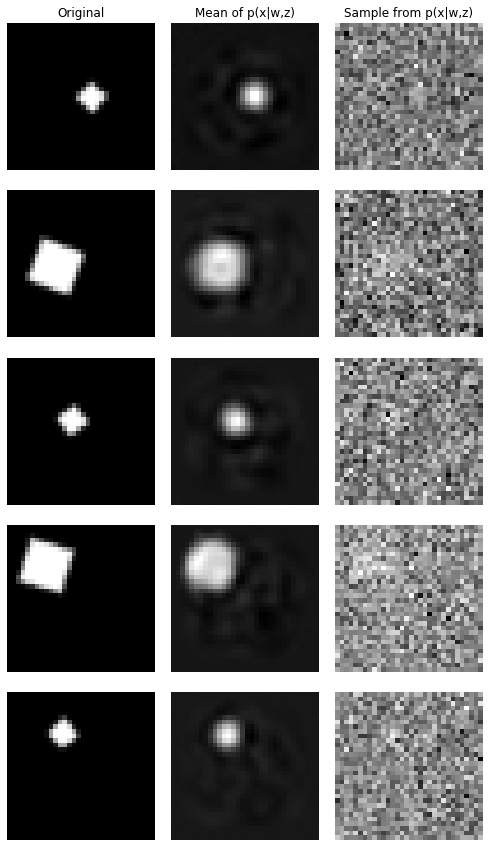

In [0]:
# plot some reconstructed examples: p(x|z,w)
plot_reconstructions(results['x_vals'][:5], results['x_means'][:5], results['x_preds'][:5], 
                     ["Original", "Mean of p(x|w,z)", "Sample from p(x|w,z)"], (7,12))

The visual check of reconstruction quality above suggests that the model has accurately encoded the position and scale of the shape, though not the shape itself -- the reconstructions suffer from the characteristic blur of generative samples from VAEs.

However, from the right column of samples from the posterior predictive p(x|w,z), it appears that samples taken further from the mean of the distribution are very unrealistic (i.e. of very poor quality, visually). Either the parameters of the posterior predictive were poorly estimated -- such that the overall distribution p(x|w,z) fails to approximate well that of the evidence, p(x) -- or the simplifying assumption that the "distribution" of the input images can be approximated by a Gaussian distribution is itself flawed. Given the complexity of images, the latter is much more likely.

**Visualization of $W$ and $Z$ subspaces**

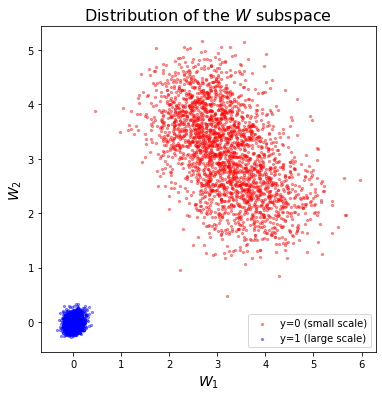

In [0]:
## show distribution of W subspace
y0_idxs = (results['y_vals'] == 0)
y1_idxs = (results['y_vals'] == 1)

fig, ax = plt.subplots(1, 1, figsize=(6,6))
ax.scatter(results['w_preds'][y0_idxs,0], results['w_preds'][y0_idxs,1], color='r', alpha=0.4, s=5, label="y=0 (small scale)")
ax.scatter(results['w_preds'][y1_idxs,0], results['w_preds'][y1_idxs,1], color='b', alpha=0.4, s=5, label="y=1 (large scale)")
ax.legend()
ax.set_xlabel("$W_1$", fontsize=14)
ax.set_ylabel("$W_2$", fontsize=14)
ax.set_title("Distribution of the $W$ subspace", fontsize=16);

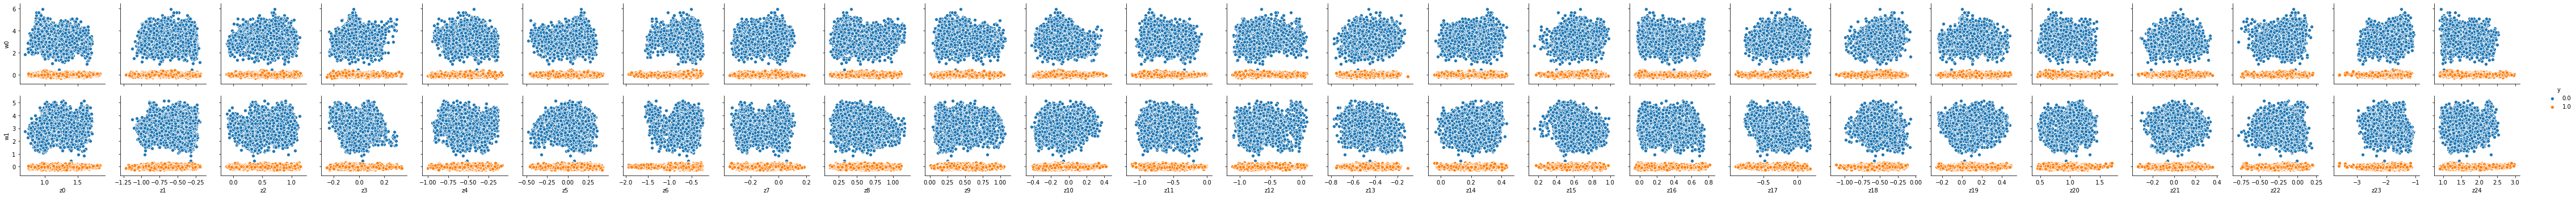

In [0]:
# show pairwise correlation between w's and z's
# NB: pairwise correlation does not demonstrate linear or nonlinear independence ("lack" of mutual info)!
w_col_names = [f"w{i}" for i in range(results['w_preds'].shape[-1])]
z_col_names = [f"z{i}" for i in range(results['z_preds'].shape[-1])]
wz_df = pd.DataFrame(np.hstack([results['w_preds'], results['z_preds'], results['y_vals'].reshape(-1,1)]), 
                     columns=w_col_names + z_col_names + ['y'])

sns.pairplot(wz_df, y_vars=w_col_names, x_vars=z_col_names, hue='y');

As we can see from the visualization of latent subspaces above, the CSVAE model has successfully learned to separate binary Y information in the $W$ latent subspace, whereas $Y$ cannot be obviously recovered from any of the individual latent dimensions in $Z$.

#### The impact on p(x|w,z) of changing w: sampling the latent space $W$



In [0]:
# load entire dataset
dataset_zip = np.load(data_fpath)
imgs = dataset_zip['imgs']
latents_values = dataset_zip['latents_values']
latents_classes = dataset_zip['latents_classes']

# make scale binary: select images of scale 0.5 or 1
bin_scale_indexes = np.isin(latents_classes[:,2], [0,5])
imgs = imgs[bin_scale_indexes, ...]
latents_classes = latents_classes[bin_scale_indexes, ...]
latents_values = latents_values[bin_scale_indexes, ...]
latents_classes[latents_classes[:,2] == 5, 2] = 1

# functions for accessing dataset
# code source: https://github.com/deepmind/dsprites-dataset/blob/master/dsprites_reloading_example.ipynb
latents_sizes = np.array([ 1, 1, 2, 40, 32, 32])
latents_names = ('color', 'shape', 'scale', 'orientation', 'posX', 'posY')
latents_bases = np.concatenate((latents_sizes[::-1].cumprod()[::-1][1:], np.array([1,])))

def latent_to_index(latents):
  return np.dot(latents, latents_bases).astype(int)

def sample_latent(size=1):
  samples = np.zeros((size, latents_sizes.size))
  for lat_i, lat_size in enumerate(latents_sizes):
    samples[:, lat_i] = np.random.randint(lat_size, size=size)

  return samples

In [0]:
def get_sample_dataloader(n_samples, imgs, conditionals=None, im_size=64):
    """
        Conditionals should be a dictionary specifying "latent property":latent value
        pairs, e.g. {'shape':0, 'scale':1} to get large squares
    """
    # Sample latents randomly
    latents_sampled = sample_latent(size=n_samples)

    # for conditional sampling of latents
    if conditionals is not None:
        for lat_name, lat_val in conditionals.items():
            lat_idx = int(np.argwhere(np.asarray(['color', 'shape', 'scale', 'orientation', 'posX', 'posY']) == lat_name))
            latents_sampled[:,lat_idx] = lat_val

    # Select images
    indices_sampled = latent_to_index(latents_sampled)
    imgs_sampled = imgs[indices_sampled]

    # store samples and labels in pytorch dataloader
    imgs_sampled = torch.Tensor(imgs_sampled)
    if im_size != 64:
        # resize images
        transform = transforms.Compose([transforms.ToPILImage(), transforms.Resize(im_size), transforms.ToTensor()]) 
        imgs_sampled = torch.stack([transform(im) for im in imgs_sampled]).squeeze()

    latents_sampled = torch.Tensor(latents_sampled[:,2])
    dsprites_dataset = torch.utils.data.TensorDataset(imgs_sampled, latents_sampled)
    dsprites_dataloader = torch.utils.data.DataLoader(dsprites_dataset, batch_size=n_samples)
    return dsprites_dataloader

In [0]:
# Spherical interpolation
# Cited in White, "Sampling Generative Networks" (2016)
# Code adapted from https://github.com/dribnet/plat/blob/master/plat/interpolate.py
def slerp(val, low, high):
    if val <= 0:
        return low
    elif val >= 1:
        return high
    elif np.allclose(low, high):
        return low
    omega = np.arccos((low/np.linalg.norm(low))  @ (high/np.linalg.norm(high)).T)
    return np.sin((1.0-val)*omega)/np.sin(omega)*low + np.sin(val*omega)/np.sin(omega)*high


def plot_interpolation_w(w1, w2, z, npoints):
    # plot interpolated points in latent space between w1 and w2, holding z fixed
    reconst_imgs = []
    fig, axes = plt.subplots(nrows=1, ncols=npoints, figsize=(20,14))
    axes = axes.ravel()
    for ax, alpha in zip(axes, np.linspace(0,1,npoints)):
         w_interp = slerp(alpha, w1.cpu().data.numpy(), w2.cpu().data.numpy())
         _, x_mean, _ = model.f_generative_X(torch.Tensor(w_interp).to(device), z)
         x_hat = x_mean.view(1,32,32).cpu().data.squeeze().numpy()
         shape_size = np.sum(x_hat)
         ax.imshow(x_hat, cmap='gray')
         ax.axis('off')
         ax.set_title(f"Shape size = {shape_size:.2f}")
         reconst_imgs.append(x_hat)
    return reconst_imgs


def plot_interpolation_z(z1, z2, w, npoints):
    # plot interpolated points in latent space between z1 and z2, holding w fixed
    reconst_imgs = []
    fig, axes = plt.subplots(nrows=1, ncols=npoints, figsize=(20,14))
    axes = axes.ravel()
    for ax, alpha in zip(axes, np.linspace(0,1,npoints)):
         z_interp = slerp(alpha, z1.cpu().data.numpy(), z2.cpu().data.numpy())
         _, x_mean, _ = model.f_generative_X(w, torch.Tensor(z_interp).to(device))
         x_hat = x_mean.view(1,32,32).cpu().data.squeeze().numpy()
         shape_size = np.sum(x_hat)
         ax.imshow(x_hat, cmap='gray')
         ax.axis('off')
         ax.set_title(f"Shape size = {shape_size:.2f}")
         reconst_imgs.append(x_hat)
    return reconst_imgs    

In [0]:
# downsamples image from 64x64 -> 32x32
transform = transforms.Compose([transforms.ToPILImage(), transforms.Resize(32), transforms.ToTensor()]) 

# sample a single set of latents, then set scale to small (y=0)
latents_sampled = sample_latent(1)

w_means_y01 = []
z_mean = None

for y_i in [0,1]:
    latents_sampled[:, 2] = y_i
    indices_sampled = latent_to_index(latents_sampled)
    imgs_sampled = imgs[indices_sampled]

    x = torch.Tensor(imgs_sampled)
    x = transform(x).view(1, 32*32).to(device)
    y = torch.Tensor([y_i]).to(device)

    results, _, _, _ = model.forward(x, y, mode='test')
    w_means_y01.append(results['w_mean'].detach())
    if z_mean is None:
        z_mean = results['z_mean'].detach()

w_y0, w_y1 = w_means_y01

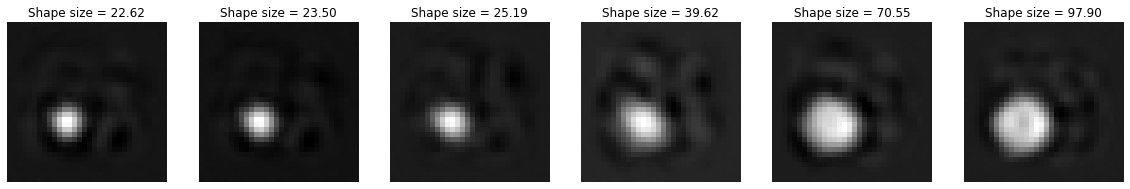

In [0]:
# plot interpolation over W subspace from w|y=0 to w|y=1, keeping z fixed
reconst_imgs = plot_interpolation_w(w_y0, w_y1, z_mean, 6)

In [0]:
def plot_shape_movement(shape_images):
    blank_img = np.copy(reconst_imgs[0])
    blank_img[:] = 0

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
    ax.imshow(blank_img.squeeze(), cmap='gray')

    for img in shape_images:
        y, x = center_of_mass(reconst_imgs[0].squeeze())
        ax.scatter(y=y, x=x, s=75, c='w', alpha=0.4)
    ax.axis('off')

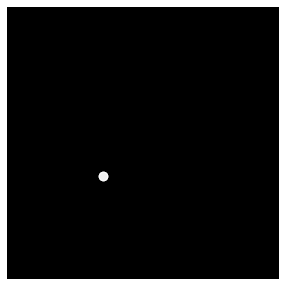

In [0]:
plot_shape_movement(reconst_imgs)

While it is not easy to measure certain dSprites attributes encoded by the latent variable  𝑍  like rotation or shape, we can measure the shape's coordinates. The figure above illustrates the (superimposed) centroids of the reconstructed shapes as the value of w was changed. Traversing the  𝑊  latent space causes imperceptible movement in the shape location, demonstrating that the x and y coordinates of the shape are completely encoded in the  𝑍  subspace.

#### The impact on p(x|w,z) of changing z: sampling the latent space $Z$


In [0]:
latents_sampled = sample_latent(1)

# Set shape location to upper left
latents_sampled[:, -1] = 0 # posY
latents_sampled[:, -2] = 0 # posX
indices_sampled = latent_to_index(latents_sampled)
img1 = imgs[indices_sampled]

# Set shape location to bottom right
latents_sampled[:, -1] = 31 # posY
latents_sampled[:, -2] = 31 # posX
indices_sampled = latent_to_index(latents_sampled)
img2 = imgs[indices_sampled]

w_means = []
z_means = []

for img in [img1, img2]:

    x = torch.Tensor(img)
    x = transform(x).view(1, 32*32).to(device)
    y = torch.Tensor(latents_sampled[:,2]).to(device)

    results, _, _, _ = model.forward(x, y, mode='test')
    z_means.append(results['z_mean'].detach())
    w_means.append(results['w_mean'].detach())

z1, z2 = z_means

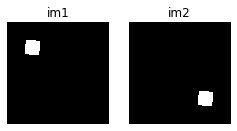

In [0]:
fig, axes = plt.subplots(1, 2, figsize=(4,4))
axes[0].imshow(img1.squeeze(), cmap='gray')
axes[1].imshow(img2.squeeze(), cmap='gray')
[ax.axis('off') for ax in axes];
[ax.set_title(title) for ax, title in zip(axes, ["im1", "im2"])];

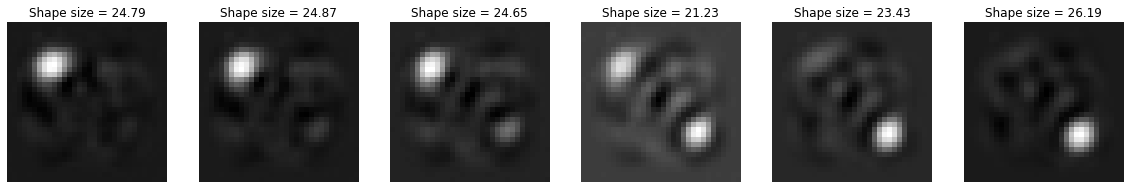

In [0]:
# plot interpolation over Z subspace, keeping w fixed
reconst_imgs = plot_interpolation_z(z1, z2, w_means[0], 6)

The size of the shape remains approximately constant while traversing the latent $Z$ subspace, suggesting (though not rigorously demonstrating) that information about object size has not been encoded in $Z$. As we discuss below, the failure of the reconstructed images with interpolated z values maintain continuity and consistency with respect to the semantically meaningful attributes encoded in $Z$ is one interesting failure of this model.

## Part 4. Demonstration on at least one instance the failure mode of the model/algorithm/solution, with an explanation for why failure occurred (is the dataset too large? Did you choose a bad hyper parameter?). The point of this is to point out edge cases to the user.

**1. Poor generative samples when interpolating over latent space**

One desirable characteristic of a generative model is that semantic variations are encoded "smoothly" over the latent space; moving a small distance in one direction in the latent space should result in a small and continuous change in certain semantically-meaningful attributes. The reconstructions generated from interpolating between different values of $W$ and $Z$ in Part 3 (immediately above) demonstrate a limitation of using this model, especially when there is little variation in the data.

In the final plot showing the result of interpolating between two values of $Z$ shows that the latent space appears to not be organized in a way that is semantically meaningful. The regions in $Z$ that fall between the embedding of an image of a shape in one location and that same shape in another location do not appear to correspond to images of that shape in the locations that fall between those two extremes.


**2. Inconsistent results**




In [0]:
### CSVAE model implementation ###
class CSVAE(nn.Module):
    def __init__(self, f_inference_W, f_inference_Z, f_generative_X, f_generative_Y, x_recon_loss_fn=nn.MSELoss(reduction='none')):
        super().__init__()
        self.f_inference_W = f_inference_W     # q(w|x,y)
        self.f_inference_Z = f_inference_Z     # q(z|x)
        self.f_generative_X = f_generative_X   # p(x|w,z)
        self.f_generative_Y =  f_generative_Y  # p(y|w)
        self.x_recon_loss_fn = x_recon_loss_fn
        
        # set optimizers for loss function
        self.optimizer1 = torch.optim.Adam(chain(self.f_generative_X.parameters(), self.f_inference_W.parameters(), self.f_inference_Z.parameters()), lr=learning_rate)
        self.optimizer2 = torch.optim.Adam(self.f_generative_Y.parameters(), lr=learning_rate)

    def forward(self, x, y):

        # encoder
        z, z_mean, z_logvar = self.f_inference_Z(x)

        w, w_mean, w_logvar = self.f_inference_W(x, y.unsqueeze(-1).float())
        
        # decoder
        x_pred, x_mean, x_logvar = self.f_generative_X(w,z)
        
        y_pred = self.f_generative_Y(z)

        # calculate loss
        loss_M1, loss_M2, loss_N = self.calculate_loss(x, y, x_pred, y_pred, z, w, x_mean, x_logvar,
             w_mean, w_logvar, z_mean, z_logvar)

        results_dict = dict(x_pred=x_pred, y_pred=y_pred, z=z, w=w,
                    x_mean=x_mean, x_logvar=x_logvar, w_mean=w_mean,
                    w_logvar=w_logvar, z_mean=z_mean, z_logvar=z_logvar)
        
        return results_dict, loss_M1, loss_M2, loss_N


    def calculate_loss(self, x, y, x_pred, y_pred, z, w, x_mean, x_logvar,
             w_mean, w_logvar, z_mean, z_logvar, 
             beta1=20., beta2=1., beta3=0.2, beta4=10., beta5=1):
      

        ## find KL divergence of q(w|x,y) and p(w|y)
        #    p(w|y=1) = N(0, 0.1^2)
        w_mean_p_y1 = torch.zeros_like(w_mean)
        w_logvar_p_y1 = torch.ones_like(w_logvar) * np.log(0.1 ** 2)
        #    p(w|y=0) = N(3, 1.0^2)
        w_mean_p_y0 = torch.ones_like(w_mean) * 3.
        w_logvar_p_y0 = torch.zeros_like(w_logvar)


        kl_w_y1 = KL_normal_normal(w_mean, w_logvar, w_mean_p_y1, w_logvar_p_y1)
        kl_w_y0 = KL_normal_normal(w_mean, w_logvar, w_mean_p_y0, w_logvar_p_y0)
        kl_w = torch.where(y.int() == 1, kl_w_y1, kl_w_y0)

        ## find KL divergence of q(z|x,y) and p(z)
        #     p(z) = N(0,1)
        z_mean_p = torch.zeros_like(z_mean)
        z_logvar_p = torch.zeros_like(z_logvar)
        kl_z = KL_normal_normal(z_mean, z_logvar, z_mean_p, z_logvar_p)

        x_recon_loss = torch.sum(self.x_recon_loss_fn(x_mean, x), -1)
        self.optimizer1.zero_grad() # goal is to minimize

        loss_M1 = torch.mean(beta1 * x_recon_loss + beta2 * kl_w + beta3 * kl_z)
        loss_M2 = beta4 * torch.mean(torch.sum(y_pred * torch.log(y_pred), -1))


        loss_M = loss_M1 + loss_M2
        loss_M.backward(retain_graph=True)
        self.optimizer1.step()

        self.optimizer2.zero_grad() # goal is to maximize
        loss_N = beta5 * torch.where(y.int() == 1,
                                -y_pred[:, 1].log(),
                                -y_pred[:, 0].log()).mean()
        loss_N.backward()
        self.optimizer2.step()
        
        return loss_M1, loss_M2, loss_N
        

In [0]:
## run model ###

# load data
xs, _ = sklearn.datasets.make_swiss_roll(10000)
xs = xs.astype(np.float32)
ys = (xs[:, 1] < 10).astype(np.int32)
trainloader = torch.utils.data.DataLoader(list(zip(xs, ys)), shuffle=True, batch_size=256)


# initiate model
encoder_w = InferenceNet_W(x_dim + 1, latent_dim_w)
encoder_z = InferenceNet_Z(x_dim, latent_dim_z)

decoder_x = GenerativeNet_X(latent_dim_w+latent_dim_z, x_dim)
decoder_y = GenerativeNet_Y(latent_dim_w)

model = CSVAE(encoder_w, encoder_z, decoder_x, decoder_y)

# train model
history = {'loss_M1':[], 'loss_M2':[], 'loss_N':[]}
with trange(num_epochs) as t:
    for i in t:
        t.set_description(f'Epoch {i}')
        
        for x, y in trainloader:
            
            results_dict, loss_M1, loss_M2, loss_N = model.forward(x,y)
            history['loss_M1'].append(loss_M1)
            history['loss_M2'].append(loss_M2)
            history['loss_N'].append(loss_N)


Epoch 199: 100%|██████████| 200/200 [01:09<00:00,  2.98it/s]


In [0]:
# collected reconstructed data from model
with torch.no_grad():
    _, zs, _ = encoder_z(torch.from_numpy(xs))
    _, ws, _ = encoder_w(torch.from_numpy(xs), torch.from_numpy(ys).unsqueeze(-1).float())
    _, x_pred, _ = decoder_x(ws, zs)
    x_pred = x_pred.cpu().numpy()

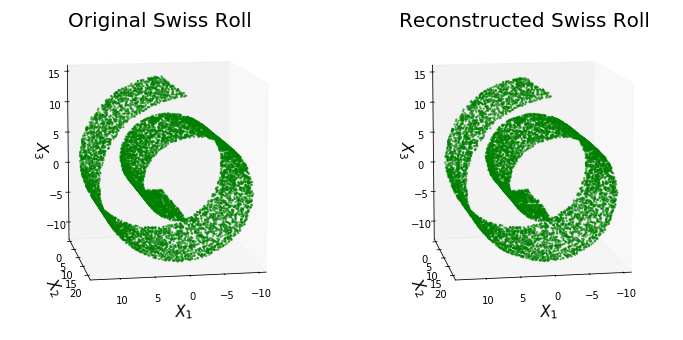

In [0]:
#--------------
# plot results
#--------------
fig = plt.figure(figsize=(12,6))

# plot of original shape
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid(False)
ax.view_init(azim=80, elev=10)
ax.scatter(xs[:, 0], xs[:, 1], xs[:, 2], color="green", s=2, alpha=0.5)
ax.set_title('Original Swiss Roll', fontsize=20)
ax.set_xlabel('$X_1$', fontsize=15)
ax.set_ylabel('$X_2$', fontsize=15)
ax.set_zlabel('$X_3$', fontsize=15)

# plot of reconstructed shape
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.grid(False)
ax.view_init(azim=80, elev=10)
ax.scatter(x_pred[:, 0], x_pred[:, 1], x_pred[:, 2], color="green", s=2, alpha=0.5)
ax.set_title('Reconstructed Swiss Roll', fontsize=20)
ax.set_xlabel('$X_1$', fontsize=15)
ax.set_ylabel('$X_2$', fontsize=15)
ax.set_zlabel('$X_3$', fontsize=15)
plt.show()

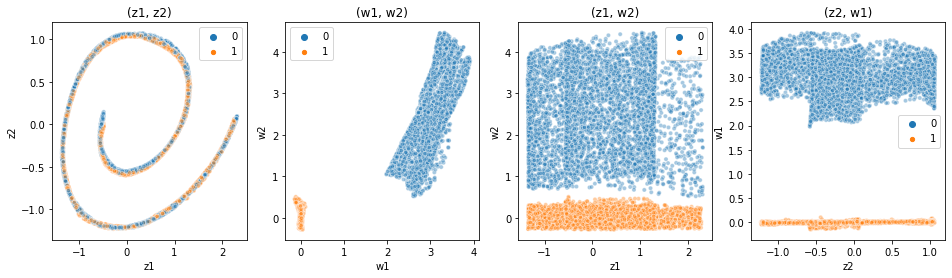

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,4))
plot_projection(zs[:,0], zs[:,1], ys, "z1", "z2", axes[0])
plot_projection(ws[:,0], ws[:,1], ys, "w1", "w2", axes[1])
plot_projection(zs[:,0], ws[:,1], ys, "z1", "w2", axes[2])
plot_projection(zs[:,1], ws[:,0], ys, "z2", "w1", axes[3])

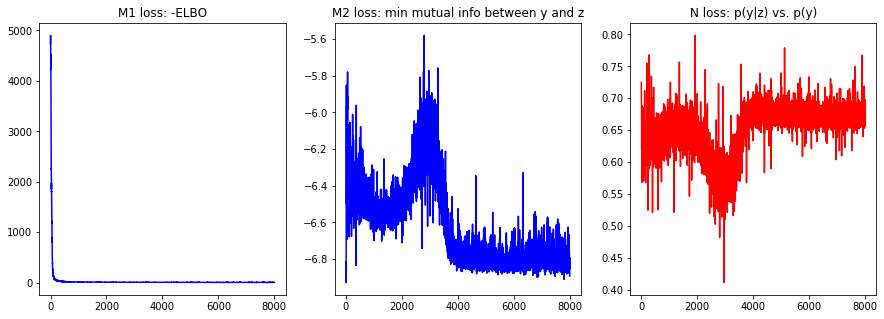

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
axes[0].plot(history['loss_M1'], color='b')
axes[1].plot(history['loss_M2'], color='b')
axes[2].plot(history['loss_N'], color='r')
[ax.set_title(title) for ax, title in zip(axes, ["M1 loss: -ELBO", 
                                                 "M2 loss: min mutual info between y and z", 
                                                 "N loss: p(y|z) vs. p(y)"])];

In Part 1, we have seen that CSVAE model performs well in separating Y label information in W latent subspace. However, we observed that when the model is rerun with exactly same architecture and parameters, the resulting latent subspace structures would vary greatly. The results above demonstrate that a new training of the model with the same model architectures and parameters produces completely different structure of latent spaces. Therefore, users should be cautioned when trying to understand how latent subspaces are organized, as the model produces inconsistent latent subspace structures and may vary by training instances.

The "jagged" plots of the loss functions give insight into a likely cause for this inconsistency: much as with Generative Adversarial Networks, the adversarial components ($M2$ and $N$) of this model's loss function tend to behave very erratically during training.

### Literature Cited

**Our final project paper:** Klys, J., Snell, J., & Zemel, R. (2018). Learning latent subspaces in variational autoencoders. In Advances in Neural Information Processing Systems (pp. 6444-6454).


[1] Creager, E., Madras, D., Jacobsen, J. H., Weis, M. A., Swersky, K., Pitassi, T., & Zemel, R. (2019). Flexibly Fair Representation Learning by Disentanglement. arXiv preprint arXiv:1906.02589.

[2] Kingma, D. P., & Welling, M. (2013). Auto-encoding variational bayes. arXiv preprint arXiv:1312.6114.

[3] Rezende, D. J., Mohamed, S., & Wierstra, D. (2014). Stochastic backpropagation and approximate inference in deep generative models. arXiv preprint arXiv:1401.4082.

[4] Langr, J., & Bok, V. (2018). GANs in Action.

[5] Doersch, C. (2016). Tutorial on Variational Autoencoders.

CSVAE model code help from: 
- https://github.com/ToniCreswell/attribute-cVAEGAN
- https://github.com/nikkou/latent-subspaces
- https://github.com/qq456cvb/CSVAE
- https://pytorch.org/tutorials/beginner/dcgan_faces_tutorial.html
